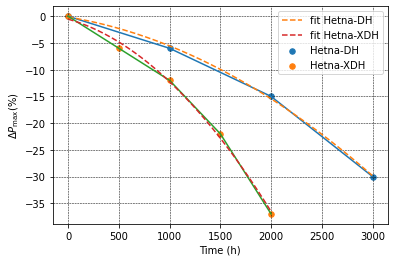

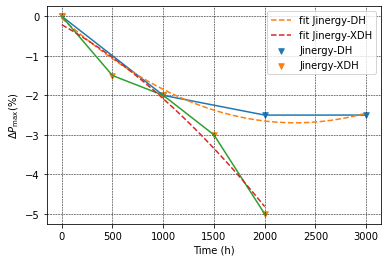

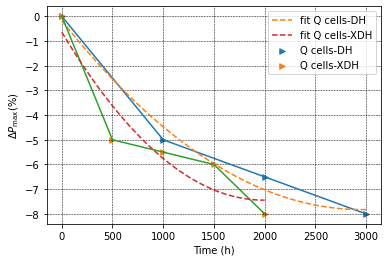

,A0,A1,A2
Hetna-DH,-2.250000e-06,-0.003150,-0.150000
Hetna-XDH,-6.285714e-06,-0.005429,-0.542857
Jinergy-DH,5.000000e-07,-0.002300,-0.050000
Jinergy-XDH,-4.285714e-07,-0.001443,-0.214286
Q cells-DH,8.750000e-07,-0.005175,-0.175000
Q cells-XDH,1.714286e-06,-0.006829,-0.642857


In [2]:
# Standard Library imports
from itertools import groupby
from pathlib import Path

#3rd party import
import matplotlib.pyplot as plt
import pandas as pd

import PVcharacterization_Utils as pv


DEFAULT_DIR = Path.home()
marker = ["o", "v", ">", "<", "s", "p"] # List of marker for the scatter plot


file = DEFAULT_DIR / Path('PVcharacterization_files/essai_XCT.xlsx')
file = DEFAULT_DIR / Path('PVcharacterization_files/essai_fit.xlsx')

#file = DEFAULT_DIR / Path('C:/Users/JR239608/PyVenv/Misc/essai_XCT.xlsx')
#file = r'C:/Users/JR239608/PyVenv/Misc/essai_XCT.xlsx'

dic_values = pv.read_and_clean(file)
new_list = []
for label,values in dic_values.items():
    module = label.split("-")[0]
    experiment = label.split("-")[1]
    new_list.append((module,experiment,values))

dic_coef = {}
index = 0
for module, g1 in groupby(sorted(new_list), lambda t: t[0]):
    for dd in list(g1):
        x,y = dd[1:][1].x,dd[1:][1].y
        experiment = dd[1:][0]
        label = module + '-' + experiment
        x_fit,y_fit,poly_coef = pv.fit_curve(x,y)
        dic_coef[label] = poly_coef
        plt.scatter(x, y, label=label, marker=marker[index],s=30)
        plt.plot(x,y)
        plt.plot(x_fit,y_fit,'--',label='fit '+label)
        plt.grid(color='k', linestyle='--', linewidth=0.5)
        plt.grid(True)
        plt.xlabel('Time (h)')
        plt.ylabel('$\Delta {P_{\max }}(\% )$')
        plt.legend()
    index += 1
    plt.show()


df_coeff = pd.DataFrame(dic_coef).T
df_coeff.rename(columns={i:'A'+str(i) for i in range(len(df_coeff.columns))},inplace=True)
df_coeff.head(20)